In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
df = pd.read_csv('data.csv',index_col=0)
df = df.set_index('IDENTIFIER')
df.drop(['ID_REF'],axis = 1, inplace=True)
annot = pd.read_csv('annot.csv')
annot = annot.set_index('IDENTIFIER')
print(df.shape)
df.head()

(22283, 192)


,GSM93997,GSM94077,GSM94078,GSM94079,GSM94080,GSM94081,GSM94082,GSM94083,GSM94084,GSM94085,...,GSM98780,GSM98781,GSM98782,GSM98783,GSM98784,GSM98871,GSM98872,GSM98873,GSM98874,GSM98875
IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
MIR4640,10.69690,10.42370,10.37440,10.50000,9.81954,10.55700,9.80262,10.70170,10.16500,10.51260,...,10.48300,10.17750,10.37710,10.65390,10.50910,9.77481,8.78686,9.44808,9.15949,9.79761
RFC2,4.23617,4.17936,4.47606,4.45140,4.36513,4.22585,4.22610,4.28330,4.52221,4.27501,...,4.59926,4.50114,4.50352,4.37395,4.50193,4.30017,4.42015,4.39043,4.50067,4.49745
HSPA6,5.34525,5.46302,5.48155,5.58359,5.61229,5.59938,5.63675,5.58582,5.68122,5.60723,...,5.70008,5.59146,5.41155,5.53759,5.58748,5.89996,6.16085,5.72454,6.00639,5.80044
PAX8,7.91919,8.07756,8.06485,8.16912,8.06497,8.09752,8.27031,8.39203,8.12784,8.13292,...,8.28901,7.95860,7.92002,8.07704,7.89864,8.33543,8.80621,8.75445,8.50262,8.22984
GUCA1A,3.47871,3.67049,3.58145,3.82038,3.78541,3.65710,3.55197,3.65108,3.96857,3.71767,...,3.61791,3.71388,3.65724,3.71731,3.64485,4.12712,3.92796,4.10855,4.20303,4.25357


now drop the NAs and lowly expressed genes

In [7]:
df.dropna(axis=0,inplace=True)
print(df.shape)

## Filter out non-expressed genes
df = df.loc[df.sum(axis=1) > 0, :]
print(df.shape)

## Filter out lowly expressed genes
mask_low_vals = (df > 0.3).sum(axis=1) > 2
df = df.loc[mask_low_vals, :]

print(df.shape)

(22215, 192)
(22215, 192)
(22215, 192)


Now take the 100 genes with the biggest variance

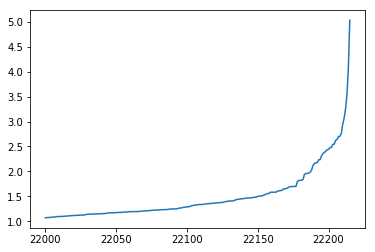

In [27]:

variances = np.var(df, axis=1)
plt.axes()
plt.plot(range(22000,22216),variances[variances.argsort()[21999:22215]])
srt_idx = variances.argsort()[::-1]
df_sub = df.iloc[srt_idx].iloc[:100]
#print(df_sub.shape)
#df_sub.head()

In [28]:
df_sub.head()


,GSM93997,GSM94077,GSM94078,GSM94079,GSM94080,GSM94081,GSM94082,GSM94083,GSM94084,GSM94085,...,GSM98780,GSM98781,GSM98782,GSM98783,GSM98784,GSM98871,GSM98872,GSM98873,GSM98874,GSM98875
IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
CYP1B1,7.26579,6.56423,8.86926,5.85270,6.24731,9.45554,5.62242,5.20574,3.44625,8.19868,...,3.76218,8.40204,3.34078,3.30353,9.06583,4.00299,4.21086,3.82717,3.55530,7.04211
CYP1B1,7.63170,8.76314,10.46590,8.12627,7.87879,10.95310,7.43099,6.90374,5.37859,10.17570,...,5.90106,9.63777,5.42388,5.14619,10.31830,6.06757,6.19799,5.99943,5.70593,7.76023
S100A8,6.34650,5.04201,6.62157,6.91238,8.49614,5.53555,8.96813,5.37909,5.92669,6.24984,...,11.45870,9.99052,9.61254,8.35789,12.58960,9.04039,5.46724,6.67072,6.28378,8.91985
HBB,11.92320,9.67974,12.44320,10.92630,10.10440,10.60840,8.54095,6.66087,9.86900,10.52000,...,12.46590,12.25200,12.95710,13.16490,11.87140,13.36520,10.21800,10.27340,11.36030,12.83450
RPS4Y1,9.90819,9.93460,5.59292,10.11200,5.75957,9.80066,6.78277,10.08470,5.79810,9.71762,...,10.29470,9.29659,10.38040,5.98027,9.82590,9.55874,7.12134,9.07717,8.76287,6.36920


In [9]:
annot.head()

,prognosis
IDENTIFIER,
GSM93997,no cancer
GSM94077,no cancer
GSM94078,no cancer
GSM94079,no cancer
GSM94080,no cancer


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
df_sub.shape

(100, 192)

In [31]:
scaler.fit(df_sub,)
scaled_data = scaler.transform(df_sub)

In [32]:
sd = pd.DataFrame(scaled_data, columns=df.columns)

In [33]:
a=pd.get_dummies(annot)

In [34]:
a.head()

,prognosis_cancer,prognosis_no cancer,prognosis_suspect cancer
IDENTIFIER,,,
GSM93997,0,1,0
GSM94077,0,1,0
GSM94078,0,1,0
GSM94079,0,1,0
GSM94080,0,1,0


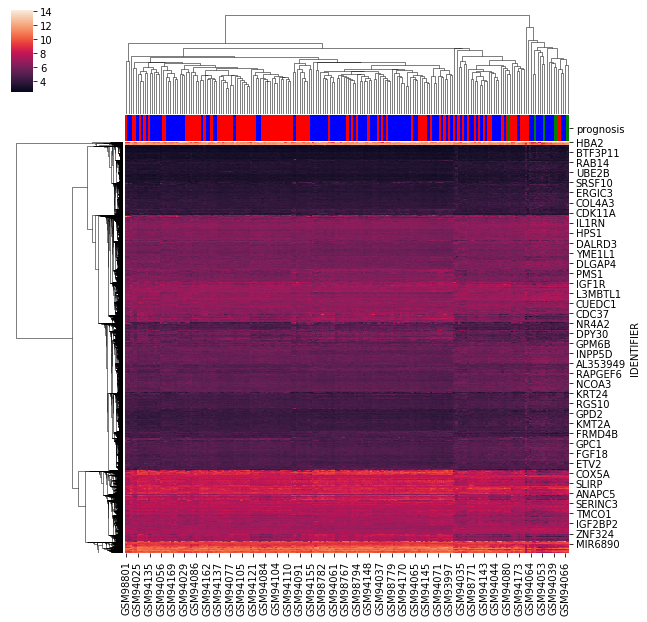

In [36]:
lut = dict(zip(annot.prognosis.unique(), "rbg"))
col_colors = annot.prognosis.map(lut)
g = sns.clustermap(df_sub, col_colors=col_colors)

In [263]:
new_col = g.dendrogram_col.reordered_ind

In [269]:
col_linkage = pd.DataFrame(g.dendrogram_col.linkage)

In [271]:
col_linkage.head()

,0,1,2,3
0,1117.0,12883.0,1.241617,2.0
1,22014.0,22060.0,1.330801,2.0
2,8319.0,8328.0,1.350006,2.0
3,820.0,11364.0,1.456514,2.0
4,10652.0,14886.0,1.468961,2.0


In [ ]:
df.std

In [224]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [225]:
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(192, 22215)
(192, 4)


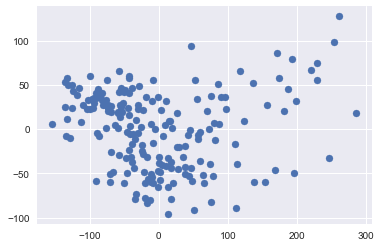

In [226]:
plt.scatter(x_pca[:,0],x_pca[:,1],)

In [227]:
p=pd.DataFrame(x_pca, index=df.index)

In [228]:
p.columns = ['dim1','dim2','dim3','dim4']

In [219]:
p['annot']=annot

In [220]:
p.head()

,dim1,dim2,dim3,dim4,annot
GSM93997,-53.654741,6.736084,-21.869210,-19.469554,no cancer
GSM94077,-12.510994,-18.708104,-1.008568,-5.800189,no cancer
GSM94078,-1.885494,-27.772897,-13.190712,5.105941,no cancer
GSM94079,-18.441995,-6.643941,10.632495,-7.997824,no cancer
GSM94080,57.826437,-12.145492,-15.367921,10.559671,no cancer


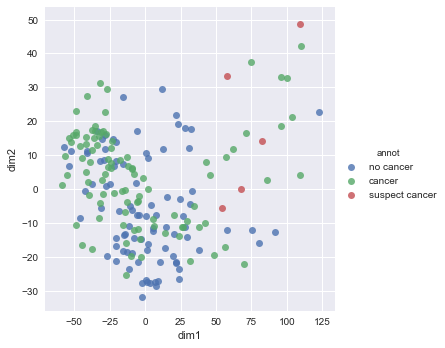

In [221]:
sns.lmplot('dim1','dim2',p,hue='annot',fit_reg=False)

In [166]:
p['annot']=annot.astype(str)

In [168]:
sns.clustermap(df)

<bound method NDFrame.head of                  prognosis
IDENTIFIER                
GSM93997         no cancer
GSM94077         no cancer
GSM94078         no cancer
GSM94079         no cancer
GSM94080         no cancer
GSM94081         no cancer
GSM94082         no cancer
GSM94083         no cancer
GSM94084         no cancer
GSM94085         no cancer
GSM94086         no cancer
GSM94087         no cancer
GSM94088         no cancer
GSM94089         no cancer
GSM94090         no cancer
GSM94091         no cancer
GSM94092         no cancer
GSM94093         no cancer
GSM94094         no cancer
GSM94095         no cancer
GSM94096         no cancer
GSM94097         no cancer
GSM94098         no cancer
GSM94099         no cancer
GSM94100         no cancer
GSM94101         no cancer
GSM94102         no cancer
GSM94103         no cancer
GSM94104         no cancer
GSM94105         no cancer
...                    ...
GSM94172            cancer
GSM94173            cancer
GSM94174            cance